<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Name: Rishita Mote
#### UID: 2018130029
#### Batch B

### **Experiment 2**
#### Objective: To implement and use Principal Component Analysis using Python Platform. 

In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

###Load the dataset (Use pandas ) 

In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
dataset=pd.read_csv('drive/MyDrive/Data Science/Lab/student-por.csv')
df=pd.DataFrame(dataset)

Mounted at /content/drive


In [ ]:
df.info()
# dataset has 649 enteries. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
#finding numerical features from the dataset
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
print('Number of Numerical variables are: ', len(numerical_features))
print('Numerical features are: ', numerical_features)
df[numerical_features].head()

Number of Numerical variables are:  16
Numerical features are:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


In [ ]:
#finding categorical features from the dataset
categorical_features = [features for features in df.columns if df[features].dtypes =='O']
print(f"Now categorical variables are: {categorical_features}")
print(f"number of categorical variables are: {categorical_features}")

Now categorical variables are: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
number of categorical variables are: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


###Data Preprocessing (Handling NA values)

In [ ]:
# check missing values in variables
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.isnull().any()

#Observation: There are no null values 

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

### Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib (What variables to include, sample size)

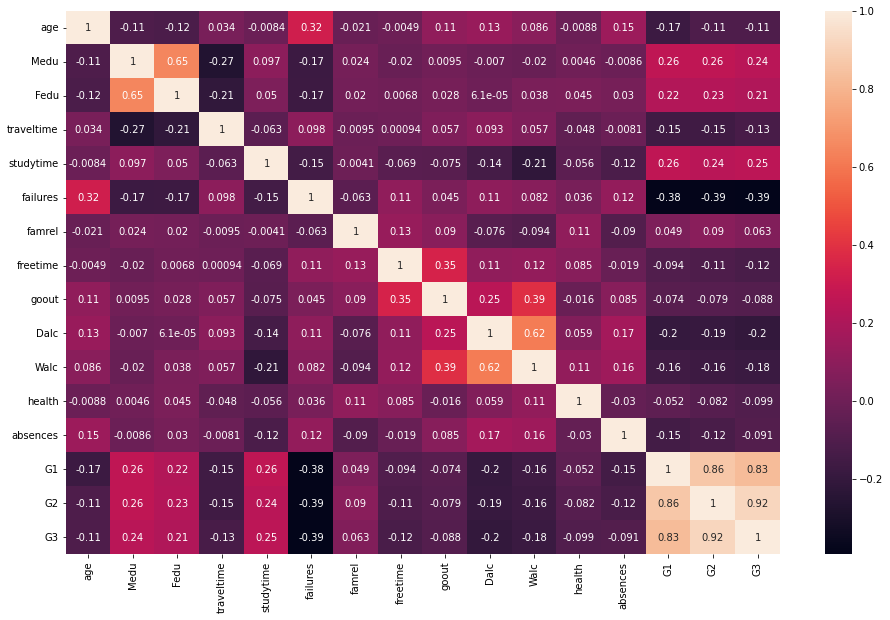

In [ ]:
# correlation matrix
%matplotlib inline
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)


In [ ]:
# observing how each numerical data correlates with target variable G3
corr_matrix = df.corr()
corr_matrix["G3"].sort_values(ascending=False)

#Observation: G3 has correlation not only with G1 and G2 but also with studytime, failures, Dalc, Walc, traveltime, freetime, age, Medu (mother's education) and Fedu (father's education)

G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

In [ ]:
df=df.drop(['famrel', 'goout', 'health', 'age', 'absences'], axis=1)

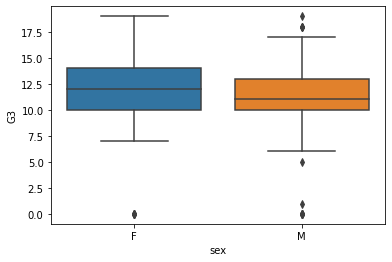

In [ ]:
# comparing the impact of each categorical feature with G3
# 1. sex and G3
sns.boxplot(x="sex", y="G3", data=df)

#Observation: sex have impact on grades

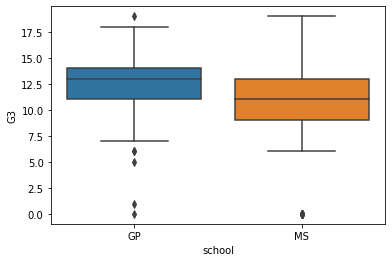

In [ ]:
#2. school and G3
sns.boxplot(x="school", y="G3", data=df)
#Observation: school impacts on grade


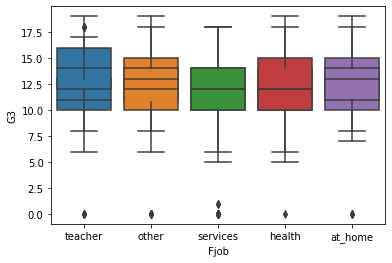

In [ ]:
#3. parent's job and G3
sns.boxplot(x="Mjob", y="G3", data=df)
sns.boxplot(x="Fjob", y="G3", data=df)
#Observation: Job has an impact on G3

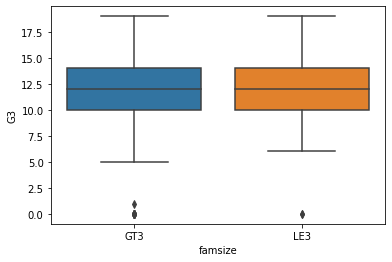

In [ ]:
#4. Family size and G3
sns.boxplot(x="famsize", y="G3", data=df)
# Observation: Fam size has no impact on G3

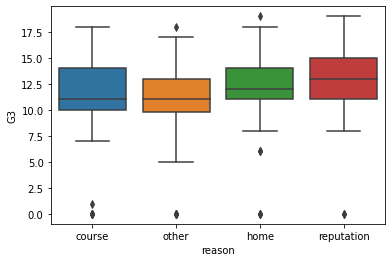

In [ ]:
#5. comparing reason and G3
sns.boxplot(x="reason", y="G3", data=df)

# Observation: Reason has an impact on G3

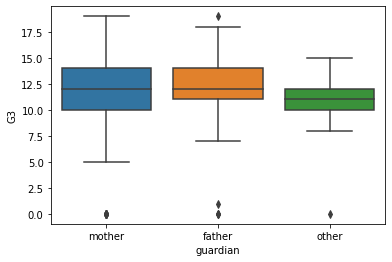

In [ ]:
#6. Guardian and G3
sns.boxplot(x="guardian", y="G3", data=df)

#Observation: Guardian has an impact on grades. Having mother or father leads to good grades as compared to other guardians.  

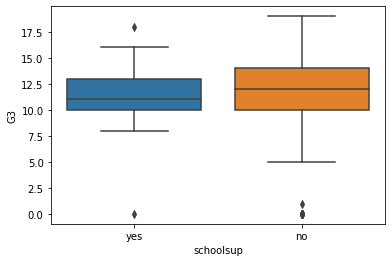

In [ ]:
# 7. schoolsup and G3
sns.boxplot(x="schoolsup", y="G3", data=df)

#yes has an impact

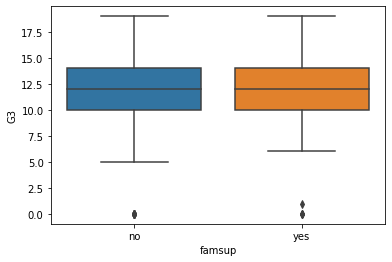

In [ ]:
sns.boxplot(x="famsup", y="G3", data=df)
# no impact

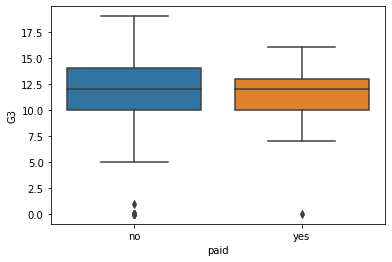

In [ ]:
sns.boxplot(x="paid", y="G3", data=df)
# Observation: Extra paid cases has an impact. 

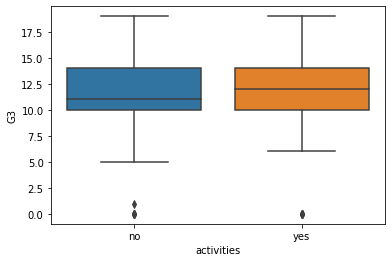

In [ ]:
sns.boxplot(x="activities", y="G3", data=df)
# no impact

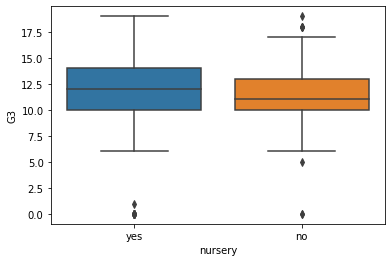

In [ ]:

sns.boxplot(x="nursery", y="G3", data=df)
# has an impact

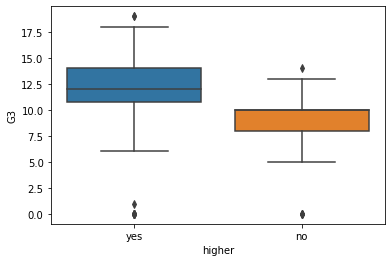

In [ ]:
sns.boxplot(x="higher", y="G3", data=df)
# Observation: students with plan to take higher education have good grades

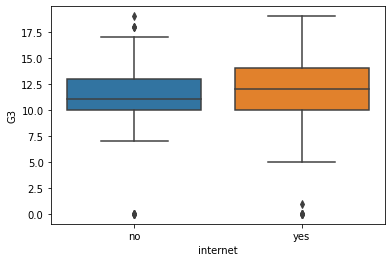

In [ ]:
sns.boxplot(x="internet", y="G3", data=df)
# Observation: students with internet connection have good grades. 

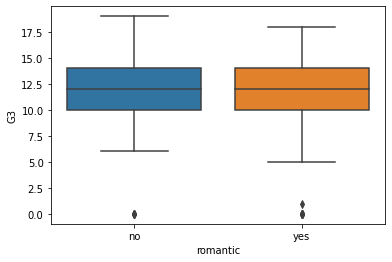

In [ ]:
sns.boxplot(x="romantic", y="G3", data=df)
#Observation: high school romance has no impact on grades

###Conclusion from EDA: Features having impact on G3: 


1.   Numerical: studytime, failures, Dalc, Walc, traveltime, freetime, Medu and Fedu, G1, G2
2.   Categorical: Sex, School, Address, Mjob + FJob, Reason, Guardian, Schoolsup, Higher, Internet 



In [ ]:
# G1 and G2 have same impact on G3. So instead of three features we can combine and have one grade column. 
#Replacing g1, g2, g3 column by G using mean method. 
#df["G"]=(df["G1"]+df["G2"]+df["G3"])/3
# dropping initial grades and leaving mean 
#df= df.drop(['G1', 'G2'], axis=1)
#df.head()

### Converting categorical features to numeric 

In [ ]:
#dropping categorical data that does not impact the target variable
df=df.drop(['famsize', 'Pstatus', 'famsup', 'activities', 'romantic'], axis = 1)

#converting categorical to numerical using one hot encoding
features_cat = ['sex','school','address','Mjob','Fjob','reason','schoolsup','guardian','higher','internet','paid', 'nursery']

df = pd.get_dummies(df, columns = features_cat)
df

,Medu,Fedu,traveltime,studytime,failures,freetime,Dalc,Walc,G1,G2,G3,sex_F,sex_M,school_GP,school_MS,address_R,address_U,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes,paid_no,paid_yes,nursery_no,nursery_yes
0,4,4,2,2,0,3,1,1,0,11,11,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1
1,1,1,1,2,0,3,1,1,9,11,11,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0
2,1,1,1,2,0,3,2,3,12,13,12,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1
3,4,2,1,3,0,2,1,1,14,14,14,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
4,3,3,1,2,0,3,1,2,11,13,13,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,1,3,1,4,1,2,10,11,10,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0
645,3,1,1,2,0,3,1,1,15,15,16,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
646,1,1,2,2,0,1,1,1,11,12,9,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
647,3,1,2,1,0,4,3,4,10,10,10,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0


###Apply Normalization and Generate Covariance Matrix

In [ ]:
X =df.drop('G3', axis=1)

y = np.array(df['G3']) 

In [ ]:
X

,Medu,Fedu,traveltime,studytime,failures,freetime,Dalc,Walc,G1,G2,sex_F,sex_M,school_GP,school_MS,address_R,address_U,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes,paid_no,paid_yes,nursery_no,nursery_yes
0,4,4,2,2,0,3,1,1,0,11,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1
1,1,1,1,2,0,3,1,1,9,11,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0
2,1,1,1,2,0,3,2,3,12,13,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1
3,4,2,1,3,0,2,1,1,14,14,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
4,3,3,1,2,0,3,1,2,11,13,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,1,3,1,4,1,2,10,11,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0
645,3,1,1,2,0,3,1,1,15,15,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
646,1,1,2,2,0,1,1,1,11,12,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
647,3,1,2,1,0,4,3,4,10,10,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0


In [ ]:
#Normalisation using Standard Scaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
#Covariance matrix
cov_matrix = np.cov(X , rowvar = False)
cov_matrix

array([[ 1.00154321,  0.6484758 , -0.26548808, ...,  0.11414873,
        -0.1261457 ,  0.1261457 ],
       [ 0.6484758 ,  1.00154321, -0.20860941, ...,  0.0947741 ,
        -0.07497817,  0.07497817],
       [-0.26548808, -0.20860941,  1.00154321, ..., -0.04491161,
         0.01152704, -0.01152704],
       ...,
       [ 0.11414873,  0.0947741 , -0.04491161, ...,  1.00154321,
        -0.02760902,  0.02760902],
       [-0.1261457 , -0.07497817,  0.01152704, ..., -0.02760902,
         1.00154321, -1.00154321],
       [ 0.1261457 ,  0.07497817, -0.01152704, ...,  0.02760902,
        -1.00154321,  1.00154321]])

In [ ]:
#using prettytable to print the covariance matrix in form of table
from prettytable import PrettyTable
df_columns = list(df.drop('G3', axis=1).columns)
cov_table = PrettyTable([' '] + df_columns)
for i in range(len(df_columns)):
    cov_table.add_row([df_columns[i]] + list(cov_matrix[i]))
print(cov_table)

+-------------------+------------------------+-----------------------+-----------------------+------------------------+------------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+------------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+-----------------------+-----------------------+------------------------+------------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+------------------------+--

### Apply PCA

In [ ]:
#eigen values and eigen vectors
eigen_values , eigen_vectors = np.linalg.eigh(cov_matrix)

In [ ]:
eigen_values

array([-7.06664195e-16, -5.81070069e-16, -2.03610880e-16, -9.01136610e-17,
       -5.69646794e-17,  1.12773782e-17,  1.84268151e-17,  1.37540114e-16,
        3.14015347e-16,  3.93629405e-16,  7.79635803e-16,  2.44481609e-15,
        1.31406695e-01,  2.38439529e-01,  3.59742995e-01,  5.51753145e-01,
        6.42679237e-01,  6.72107988e-01,  7.13550041e-01,  7.45730699e-01,
        8.43888430e-01,  8.89339877e-01,  9.07994084e-01,  9.38191363e-01,
        9.89611672e-01,  1.04905558e+00,  1.09282805e+00,  1.12393744e+00,
        1.15367431e+00,  1.27473652e+00,  1.34631477e+00,  1.46003485e+00,
        1.49209678e+00,  1.69466340e+00,  1.74925582e+00,  1.84231692e+00,
        1.87196068e+00,  2.10657861e+00,  2.15563430e+00,  2.28465079e+00,
        2.50477927e+00,  3.18493984e+00,  5.05446436e+00])

In [ ]:
eigen_vectors

#Each column in the Eigen vector-matrix corresponds to a principal component

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.94388087e-01,  1.24407984e-01, -2.81918951e-01],
       [ 7.30507219e-17, -6.92059470e-17,  1.02527329e-17, ...,
        -2.05390029e-01,  1.07323621e-01, -2.37155675e-01],
       [ 5.17644836e-17,  3.03808781e-16, -1.23502381e-17, ...,
        -8.92251168e-02, -4.14370704e-02,  1.94962916e-01],
       ...,
       [ 1.13637615e-01, -2.02949880e-01,  5.19669407e-01, ...,
        -7.81158432e-02,  1.18829377e-01, -9.85476544e-03],
       [ 7.43220506e-02, -7.20278230e-02,  1.81075930e-01, ...,
         2.41259016e-01,  8.51348409e-02,  5.57242511e-02],
       [ 7.43220506e-02, -7.20278230e-02,  1.81075930e-01, ...,
        -2.41259016e-01, -8.51348409e-02, -5.57242511e-02]])

In [ ]:
#Sorted Eigen Values and Eigen Vectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
sorted_eigenvalue

array([ 5.05446436e+00,  3.18493984e+00,  2.50477927e+00,  2.28465079e+00,
        2.15563430e+00,  2.10657861e+00,  1.87196068e+00,  1.84231692e+00,
        1.74925582e+00,  1.69466340e+00,  1.49209678e+00,  1.46003485e+00,
        1.34631477e+00,  1.27473652e+00,  1.15367431e+00,  1.12393744e+00,
        1.09282805e+00,  1.04905558e+00,  9.89611672e-01,  9.38191363e-01,
        9.07994084e-01,  8.89339877e-01,  8.43888430e-01,  7.45730699e-01,
        7.13550041e-01,  6.72107988e-01,  6.42679237e-01,  5.51753145e-01,
        3.59742995e-01,  2.38439529e-01,  1.31406695e-01,  2.44481609e-15,
        7.79635803e-16,  3.93629405e-16,  3.14015347e-16,  1.37540114e-16,
        1.84268151e-17,  1.12773782e-17, -5.69646794e-17, -9.01136610e-17,
       -2.03610880e-16, -5.81070069e-16, -7.06664195e-16])

In [ ]:
sorted_eigenvectors

array([[-2.81918951e-01,  1.24407984e-01, -1.94388087e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.37155675e-01,  1.07323621e-01, -2.05390029e-01, ...,
         1.02527329e-17, -6.92059470e-17,  7.30507219e-17],
       [ 1.94962916e-01, -4.14370704e-02, -8.92251168e-02, ...,
        -1.23502381e-17,  3.03808781e-16,  5.17644836e-17],
       ...,
       [-9.85476544e-03,  1.18829377e-01, -7.81158432e-02, ...,
         5.19669407e-01, -2.02949880e-01,  1.13637615e-01],
       [ 5.57242511e-02,  8.51348409e-02,  2.41259016e-01, ...,
         1.81075930e-01, -7.20278230e-02,  7.43220506e-02],
       [-5.57242511e-02, -8.51348409e-02, -2.41259016e-01, ...,
         1.81075930e-01, -7.20278230e-02,  7.43220506e-02]])

In [ ]:
#Selecting a subset from the rearranged Eigenvalue matrix
num_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()
X_reduced

array([[ 0.14192562, -1.87486426],
       [ 0.56273088, -1.01334948],
       [-0.39069739, -1.60692478],
       ...,
       [ 1.91988995, -3.1290889 ],
       [ 1.0983419 ,  3.05481225],
       [ 2.13253018,  2.27285573]])

In [ ]:
principal_data =  pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
principal_data = pd.concat([principal_data, df['G3']], axis=1)
principal_data

,PC1,PC2,G3
0,0.141926,-1.874864,11
1,0.562731,-1.013349,11
2,-0.390697,-1.606925,12
3,-3.135735,-0.979588,14
4,-0.783256,-1.598609,13
...,...,...,...
644,1.416095,-0.695756,10
645,-1.149299,-1.302496,16
646,1.919890,-3.129089,9
647,1.098342,3.054812,10


###Build the model, summarize it and evaluate the model and Summarize

In [ ]:
from sklearn.model_selection import train_test_split
# Independent attributes
X = principal_data.drop(columns='G3')

# Dependent attributes
Y = principal_data[['G3']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=80)

In [ ]:
# Building Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Summarize the model

In [ ]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Prediction

In [ ]:
y_pred = regressor.predict(X_test)

### Evaluation

In [ ]:
regressor_score = regressor.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(regressor_score, 5))

Score of Linear Regression Model:  0.49427


In [ ]:
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 5))

Mean Squared Error (MSE):  5.99719


In [ ]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),5))

Root Mean Squared Error (RMSE):  2.44892


### Conclusion: 


1.   In this experiment, I implemented dimensionaity reduction technique Principal Component Analysis (PCA) on student performance dataset of a Portuguese schools. 
2.   I was able to visualize the data and compare the impact of each categorical and numerical feature on the target variable. 
3. I performed normalization and generated eigen values and eigen vectors. 
4. I understood how to form principal components and thus implemented it. 
5. I performed linear regression and got a regression score: 0.49427. I observed that since there are few samples in the dataset, hence the score is less. 

